# Machine Learning - Practical 2 - Linear Regression with Pytorch

Names: {YOUR NAMES}  
Summer Term 2023   
Due Date: Tuesday, May 16, 2pm

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Machine learning 1` -> `Files` -> `Submission of Homework 2`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

You will need access to a machine with a GPU to properly work on the exercises. We recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`.

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a logistic regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical.

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)


## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [1]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
torch.set_default_dtype(torch.float64) 
#is a function call in the PyTorch library that sets the default data type for all tensor operations to 64-bit floating point numbers 

In [3]:
print(torch.cuda.is_available())


True


## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [4]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()


(True, True, 1)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

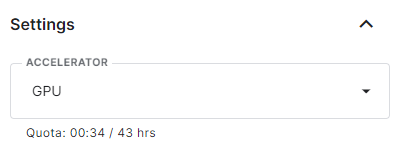

Now check the availability again (after re-running the imports)

In [5]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, True, 1, 0)

Choose your device for computation. CPU or one of your CUDA devices?

In [6]:
# DO NOT CHANGE
use_cuda = True
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# PyTorch: Getting to know Tensors

PyTorch is a library for deep learning on arbitray datasets, including irregular input data such as graphs, point clouds and manifolds. 

In this short tutorial we will explore some of its features to handle data in tensors. 
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [7]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
print(numpyarray.size)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

10


Let us find out what the properties of this tensor 'a' are.

In [8]:
# TODO print the tensor
print(a)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [9]:
# TODO print its type
print("Type of a:", type(a))

Type of a: <class 'torch.Tensor'>


In [10]:
# TODO print its shape
print("Shape of a:", a.shape) # 2 rows, 5 cols

Shape of a: torch.Size([2, 5])


In [11]:
# TODO print its size
print("Size of a:", a.size()) # you can specifiy a specific dimension of interest here in the brackets

Size of a: torch.Size([2, 5])


In [12]:
# TODO create a new numpy array out of the tensor and print its size
newnumpy = a.numpy()
print("Size of new numpy array:", newnumpy.size)

Size of new numpy array: 10


Let's create some new tensors.

In [13]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
x = torch.ones((2, 5), dtype=torch.int)
print(x)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)


In [14]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
y = torch.zeros((3,4))
print(y)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [15]:
# TODO transpose the tensor 'a'
a_t = a.t()
print(a_t)

a.transpose(0,1) # In this case, the first argument 0 represents the current first dimension of the tensor, which corresponds to the rows in the matrix representation of the tensor, and the second argument 1 represents the current second dimension of the tensor, which corresponds to the columns in the matrix representation of the tensor. So, by transposing dimensions 0 and 1, we are effectively swapping rows and columns.

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

Now change a value in the numpy array. Does the corresponding tensor change?

In [16]:
# TODO change value in numpy array and inspect the tensor a
numpyarray[0, 1] = 10 # second element of first row
print(numpyarray)
print(a)

[[ 0 10  2  3  4]
 [ 5  6  7  8  9]]
tensor([[ 0, 10,  2,  3,  4],
        [ 5,  6,  7,  8,  9]])


**TODO Your answer here** - 

Yes, changing a value in the NumPy array will change the corresponding value in the PyTorch tensor a since the tensor a and the NumPy array numpyarray share the same underlying data. This works also the other way round:

In [17]:
a[1,1] = 111 # second element of second row
print(numpyarray)
print(a)

[[  0  10   2   3   4]
 [  5 111   7   8   9]]
tensor([[  0,  10,   2,   3,   4],
        [  5, 111,   7,   8,   9]])


Now we want to make use of the different devices available, namely cpu and gpu. 

In [18]:
# TODO move 'a' to the gpu
print(device)
a_gpu = a.to(device)

a[0,2] = 111222
print("CPU tensor:", a)
print("GPU tensor:", a_gpu)

print("\n")

a_gpu[1,0] = 111
print("CPU tensor:", a)
print("GPU tensor:", a_gpu)

print(numpyarray)

cuda:0
CPU tensor: tensor([[     0,     10, 111222,      3,      4],
        [     5,    111,      7,      8,      9]])
GPU tensor: tensor([[  0,  10,   2,   3,   4],
        [  5, 111,   7,   8,   9]], device='cuda:0')


CPU tensor: tensor([[     0,     10, 111222,      3,      4],
        [     5,    111,      7,      8,      9]])
GPU tensor: tensor([[  0,  10,   2,   3,   4],
        [111, 111,   7,   8,   9]], device='cuda:0')
[[     0     10 111222      3      4]
 [     5    111      7      8      9]]


If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

**TODO Your answer here** -
No. For me it does not synchronize in both directions.

# Deep Learning with Pytorch

The process of training and evaluating a deep learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data pannels we have to define our custom normalisation inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook.


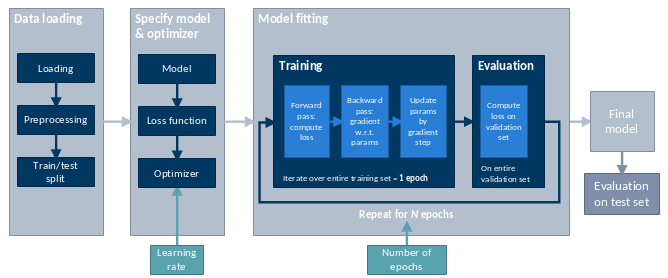

## Data Loading and Preprocessing 

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data. The purpose of this is to evaluate the model's performance on data it hasn't seen before, and to avoid overfitting by ensuring that the model hasn't memorized the training data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results. It's important to avoid using the test set during any part of the training process or model selection. This can lead to overfitting to the test set, and the model may not generalize well to new, unseen data. 

Usually, train and test datasets are already splitted in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [19]:
test_size = 0.2 # proportion of the dataset that should be allocated to the test set. In this case, the test set will be 20% of the entire dataset.
target_clm='critical_temp'

In [20]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
data = pd.read_csv('/kaggle/input/superconduct-traincsv/superconduct_train.csv') 
train, test = train_test_split(data, test_size=test_size, random_state=42)

print(len(data))
print(len(test))
print(len(train))

21263
4253
17010


### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**. 
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalisation. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [21]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes, 
        x is data without target column
        y is target column; target_clm
        transform df to_numpy
        
        df: pandas dataframe containing data
        mean: mean of data for normalization
        std: standard deviation of data for normalization
        normalise: boolean indicating if the data should be normalized
        ''' 
        self.x = df.drop(target_clm, axis=1).to_numpy() # extract features and convert to numpy array
        self.y = df[target_clm].to_numpy() # extract target variable and convert to numpy array
        self.mean = mean
        self.std = std
        self.normalise = normalise
    
    def __len__(self): # method should return the total number of samples in the dataset.
        # TODO: return whole dataset length
        return len(self.x)
        
    
    def __getitem__(self, index):
        '''
        Return one sample of data and corresponding y variable at index. Standardise if normalise=True and mean and std are specified
        Only features are standardized.
        '''
        data = self.x[index] # features only
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
        return data, self.y[index]
    
    '''
    Typically, it's common to normalize only the features and not the target variable. 
    This is because normalization is often used to make the range of values for different features more comparable, 
    so that they can be more easily used together in a machine learning model.
    '''
    

In [22]:
tmp_dataset = Dataset(train, target_clm, normalise=False)

In [23]:
# TODO calculate the mean and standard deviation of train dataset
# vector of means and std of training set features (only!); We do not standardise the target
mean = np.mean(tmp_dataset.x, axis=0)
std = np.std(tmp_dataset.x, axis=0)

print(mean)
print(std) 

[4.11757790e+00 8.75523005e+01 7.30142221e+01 7.12302088e+01
 5.85247603e+01 1.16575787e+00 1.06464388e+00 1.15807500e+02
 3.32682487e+01 4.44694609e+01 4.15298287e+01 7.69788332e+02
 8.70284583e+02 7.37655264e+02 8.32620868e+02 1.29982324e+00
 9.28495511e-01 5.72425844e+02 4.82717218e+02 2.15689296e+02
 2.24104234e+02 1.57913092e+02 1.34749939e+02 1.44381559e+02
 1.21024549e+02 1.26839402e+00 1.13226504e+00 1.39381481e+02
 5.13245274e+01 5.16045745e+01 5.23450162e+01 6.10835219e+03
 5.26715243e+03 3.44899631e+03 3.11110002e+03 1.07269458e+00
 8.57139890e-01 8.67431503e+03 2.90942025e+03 3.42041426e+03
 3.32393190e+03 7.68351735e+01 9.25936162e+01 5.42601826e+01
 7.22048922e+01 1.07071156e+00 7.71729564e-01 1.20792337e+02
 5.92340515e+01 4.89519425e+01 4.44916042e+01 1.42455537e+01
 1.37967946e+01 1.01056386e+01 1.00983917e+01 1.09406172e+00
 9.15693613e-01 2.10660408e+01 8.17696259e+00 8.29188817e+00
 7.70226694e+00 8.97082808e+01 8.14930231e+01 2.96700577e+01
 2.71547665e+01 7.276013

In [24]:
# TODO define new datasets with mean, std and normalise=True
conductor_train = Dataset(train, target_clm, mean=mean, std=std, normalise=True)
conductor_test = Dataset(test, target_clm, mean=mean, std=std, normalise=True)

We need to **split** the train dataset in two sets, one for training and one for validation. 
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure reproducibility.

In [25]:
# split the train dataset in conductor_train and conductor_val
conductor_train, conductor_val = torch.utils.data.random_split(conductor_train, [int(0.9 * len(conductor_train)), int(0.1 * len(conductor_train))], generator=torch.Generator().manual_seed(42))

In [26]:
batch_size = 256

'''
batch_size is a hyperparameter that determines the number of samples that will be propagated through the neural network at once. 
In other words, it specifies the number of samples that will be processed by the model in a single iteration.
When training a deep neural network, it is often not feasible to pass all the training examples through the model in one go, 
especially when the dataset is large. Therefore, the data is split into batches, and the model updates its weights after each batch.
The choice of batch_size can affect the performance and convergence of the model, as well as the memory usage during training. 
A larger batch_size can lead to faster convergence, but it also requires more memory.
'''

'\nbatch_size is a hyperparameter that determines the number of samples that will be propagated through the neural network at once. \nIn other words, it specifies the number of samples that will be processed by the model in a single iteration.\nWhen training a deep neural network, it is often not feasible to pass all the training examples through the model in one go, \nespecially when the dataset is large. Therefore, the data is split into batches, and the model updates its weights after each batch.\nThe choice of batch_size can affect the performance and convergence of the model, as well as the memory usage during training. \nA larger batch_size can lead to faster convergence, but it also requires more memory.\n'

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [27]:
# TODO create dataloader for training, validation and test
train_dataloader = torch.utils.data.DataLoader(conductor_train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(conductor_val, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(conductor_test, batch_size=batch_size, shuffle=True)

print(train_dataloader)
print(len(val_dataloader))
print(len(train_dataloader))


7
60


Let's get a data point now to see what we're dealing with. 

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [28]:
# TODO display an element of the train_dataloader
x, y = next(iter(train_dataloader)) # returns the first batch from the traindataloader

print(x)
print(y)

tensor([[ 0.6128, -0.8218,  0.0413,  ..., -0.2745,  1.0032,  1.0336],
        [ 1.3072,  0.7273,  0.3415,  ..., -0.9240,  0.5724,  0.1574],
        [ 0.6128, -0.1455, -0.3923,  ..., -0.5834,  0.7417,  0.8219],
        ...,
        [-1.4705,  4.0716,  4.0298,  ..., -0.1850, -0.7037, -0.4790],
        [-1.4705,  2.0445,  1.9732,  ...,  1.5299, -1.7361, -1.4843],
        [ 1.3072,  0.1975,  0.4089,  ...,  0.8791,  1.7902,  2.2616]])
tensor([4.1700e+01, 1.0000e+02, 8.0000e+01, 7.6400e+00, 9.0300e+01, 9.0000e+01,
        3.4000e+00, 2.5000e+00, 7.0000e+01, 3.1600e+01, 2.1200e+00, 2.5000e+01,
        1.3000e+00, 2.4000e+00, 3.0000e+01, 2.8600e+00, 1.1300e+02, 7.1500e+00,
        3.9600e+00, 2.3000e+01, 3.3200e+00, 7.6000e+01, 3.0690e+01, 5.4300e+00,
        7.9200e+01, 1.8000e+01, 1.8000e+01, 3.2000e+01, 1.8500e+00, 3.9200e+00,
        6.8000e+00, 2.1000e+01, 9.5000e+00, 3.6400e+00, 7.5000e+01, 1.2700e+01,
        2.1400e+00, 4.0000e+00, 6.0000e+00, 3.4900e+01, 4.2000e+01, 3.0000e+01,
      

This output tells that we have one batch of 256 samples in train dataloader. Each sample in the batch has a shape of (81,) which corresponds to the number of features in your dataset. Additionally, we have the target variable for each sample in the batch with a shape of (256,) which means that we have one target variable for each sample in the batch. Observations per batch: 256

In [29]:
# TODO display the dimensions of x and y
print("Data shape:", x.shape)
print("Target shape:", y.shape)

Data shape: torch.Size([256, 81])
Target shape: torch.Size([256])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables: 
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and 
- the learning rate.


In [30]:
epochs = 1 
# The variable epochs specifies the number of times the entire dataset will be passed through the model during training.
input_dim = 81
output_dim = 1 
# The variables input_dim and output_dim specify the size of the input and output of the linear layer, respectively.
lr = 0.001
# The variable lr specifies the learning rate of the optimizer, which controls the step size taken by the optimizer during the training process.


In a neural network, the input layer consists of the features or input variables of the data. Each feature is represented by one node in the input layer. The output layer, on the other hand, is the final layer of the network that produces the output of the model, which in this case is a single predicted label for a specific training input row.

In this example, the input dimension is set to 81, which means that the input layer of the model will consist of 81 nodes, each representing a feature of the input data. The output dimension is set to 1, which means that the output layer of the model will consist of a single node that represents the predicted label for a specific input row.

The choice of input and output dimension depends on the specific problem and the structure of the data. In this case, it seems that we are dealing with a regression problem, where the goal is to predict a continuous value (the critical temperature of a superconductor) based on a set of input features. The output can be expected to be a single number representing the predicted critical temperature for a specific input sample.

In [31]:
class LinearRegression(torch.nn.Module):
    """
    Logistic regression model inherits the torch.nn.Module 
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linlay = torch.nn.Linear(input_dim, output_dim)


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.view(x.size(0), -1)
        
        '''
        The view function is used in PyTorch to reshape tensors. It returns a tensor 
        with the same data as the original tensor but with a different size or shape. 
        The argument passed to view specifies the new size or shape of the tensor.
        In this case the rows of x are taken (256). The "-1" 
        The view function is used in PyTorch to reshape tensors. 
        It returns a tensor with the same data as the original tensor but with a different size or shape. 
        The argument passed to view specifies the new size or shape of the tensor.
        '''

        # TODO run the data through the layer
        outputs = self.linlay(x)

        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [32]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)
#This will create an instance of the LinearRegression class with the specified input and output dimensions.
print(model)

LinearRegression(
  (linlay): Linear(in_features=81, out_features=1, bias=True)
)


Feed the model to the GPU if available.

In [33]:
# TODO move model to device you specified above
model = model.to(device)


Put the model in training mode.

In [34]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linlay): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression progrem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss. 

In [35]:
# TODO define the loss function
loss_function = torch.nn.MSELoss()
# This creates an instance of the MSELoss class, 
# which measures the mean squared error between each element in the predicted and target tensor.

### Define the Optimizer

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).

In [36]:
# DO NOT CHANGE
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

In [37]:
for epoch in range(epochs):
    for (x, y) in train_dataloader:
        # move the data to the device
        x = x.to(device)
        y = y.to(device)

        # delete the gradients from last training iteration
        optimizer.zero_grad()

        # Forward pass: get predictions
        y_pred = model(x)

        # Compute loss
        loss = loss_function(y_pred.squeeze(), y)

        # Backward pass -> calculate gradients, update weights
        loss.backward()
        optimizer.step()

    # Print progress
    if epoch % 5 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 1459.3524


### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately? 

Set the number of epochs to 15 and try again!

**TODO your answer here** - 

Not really accurate predictions.

In [38]:
# TODO get a random element of the test dataloader
x, y = next(iter(test_dataloader))

# TODO set model in eval mode
model.eval()

# no automatic gradient update needed in evaluation
with torch.no_grad():
    # TODO make a prediction
    y_pred = model(x.to(device))


i = random.randint(0, 255)    
    
# print predicted label and given label
print("predicted label: ", y_pred[i])
print("given label: ", y[i])


predicted label:  tensor([21.3056], device='cuda:0')
given label:  tensor(56.2000)


Runnning again with epoch = 15:

In [39]:
epochs = 15 
train_dataloader = torch.utils.data.DataLoader(conductor_train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(conductor_val, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(conductor_test, batch_size=batch_size, shuffle=True)

model = LinearRegression(input_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model = model.to(device)
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(train_dataloader):
        # move the data to the device
        x = x.to(device)
        y = y.to(device)

        # delete the gradients from last training iteration
        optimizer.zero_grad()

        # Forward pass: get predictions
        y_pred = model(x)

        # Compute loss
        loss = loss_function(y_pred.squeeze(), y)

        # Backward pass -> calculate gradients, update weights
        loss.backward()
        optimizer.step()

    # Print progress
    if epoch % 2 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# TODO get a random element of the test dataloader
x, y = next(iter(test_dataloader))

# TODO set model in eval mode
model.eval()

# no automatic gradient update needed in evaluation
with torch.no_grad():
    # TODO make a prediction
    y_pred = model(x.to(device))


i = random.randint(0, 255)    
    
# print predicted label and given label
print("predicted label: ", y_pred[i])
print("given label: ", y[i])

Epoch 0, Loss: 1429.6852
Epoch 2, Loss: 1129.5092
Epoch 4, Loss: 883.2308
Epoch 6, Loss: 636.6010
Epoch 8, Loss: 465.4050
Epoch 10, Loss: 624.3203
Epoch 12, Loss: 480.0205
Epoch 14, Loss: 440.4783
predicted label:  tensor([22.2354], device='cuda:0')
given label:  tensor(35.6000)


### Track and Plot the Training and Validation error 

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.


The plot should look similar to this:


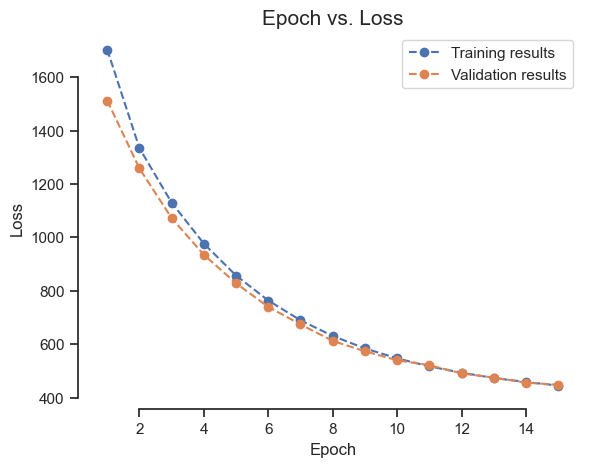


**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [40]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss (over all batches?)

def train(model, train_dataloader, loss_function, optimizer):
    
    model.train()
    train_losses = []
    mean_loss = 0.0
    
    
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = loss_function(y_pred.squeeze(), y)
        
        train_losses.append(loss.item())
        mean_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    n = len(train_dataloader)
    mean_loss /= n
    
    return train_losses, mean_loss



In [41]:
# TODO write a validation function that calculates the loss on the validation set
# you can also combine it with the training function
def validate(model, val_dataloader, loss_function):
    val_losses = []
    mean_loss = 0.0
    
    model.eval()  # Set the model in evaluation mode
    
    with torch.no_grad():
        for x, y in val_dataloader:
            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = loss_function(y_pred.squeeze(), y)
            val_losses.append(loss.item())
            mean_loss += loss.item()
            
    n = len(val_dataloader)

    mean_loss /= n
    
    return val_losses, mean_loss



In [42]:
# TODO write a run_training function that 
# - calls the train and validate functions for each epoch
# - saves the MEAN (??) train_losses, val_losses as arrays for each epoch
def run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, num_epochs):
    
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        train_loss, train_mean_loss = train(model, train_dataloader, loss_function, optimizer)
        val_loss, val_mean_loss = validate(model, val_dataloader, loss_function)

        train_losses.append(train_mean_loss)
        val_losses.append(val_mean_loss)

        # Print progress
        #print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_mean_loss:.4f}, Val Loss: {val_mean_loss:.4f}')

    return train_losses, val_losses






In [43]:
# TODO call the run_training function and run it for 10 epochs.

num_epochs = 10

train_dataloader = torch.utils.data.DataLoader(conductor_train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(conductor_val, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(conductor_test, batch_size=batch_size, shuffle=True)
model = LinearRegression(input_dim, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model = model.to(device)
    
train_losses, val_losses = run_training(model, train_dataloader, val_dataloader, loss_function, optimizer, num_epochs)

print(train_losses)
print(val_losses)

[1730.759678279673, 1361.3353614875916, 1153.5321122129171, 996.6505095206759, 873.9304224900796, 778.3739674772349, 702.3903872967743, 642.6673711739032, 594.9439246354832, 556.8912771230025]
[1405.9655833104396, 1184.9556175985083, 1010.7877648771113, 875.9873595087956, 773.1264226394982, 693.8665494699806, 633.2589728168457, 583.9333873856499, 545.7381083337474, 520.7832642626936]


In [44]:
# TODO write a plot function
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, 'o--', label='Train Loss') 
    plt.plot(val_losses, 'o--', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

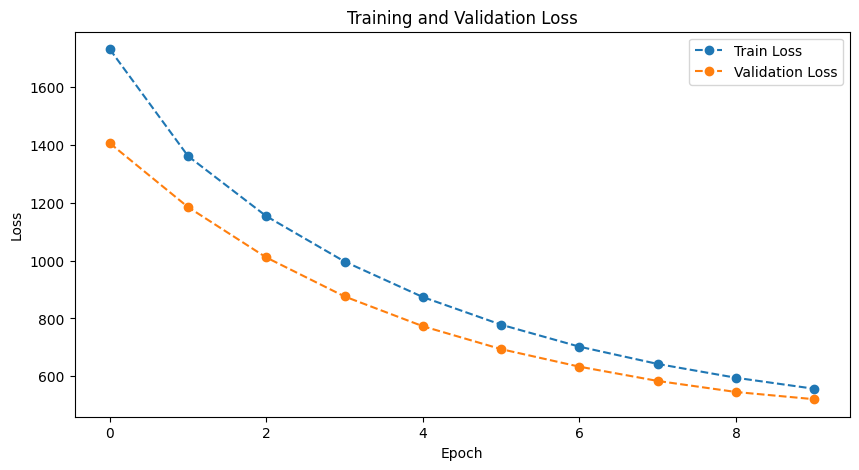

In [45]:
# TODO plot losses
plot_losses(train_losses, val_losses)


In [46]:
# TODO comment on the loss curve. Does it look as expected? Why/Why not?
# If not, what might be the reason.

**TODO** Compare the pytorch resulting loss value and the resulting loss from practical 1? Are they the same? Why?